## Linear Functions

Თქვენი აზრით, არის თუ არა რაიმე კავშირი პინგვინის ფრთის სიგრძესა და პინგვინის წონასთან?
Რაიმე კავშირი ნისკარტის “სიმაღლეს” და წონას შორის?



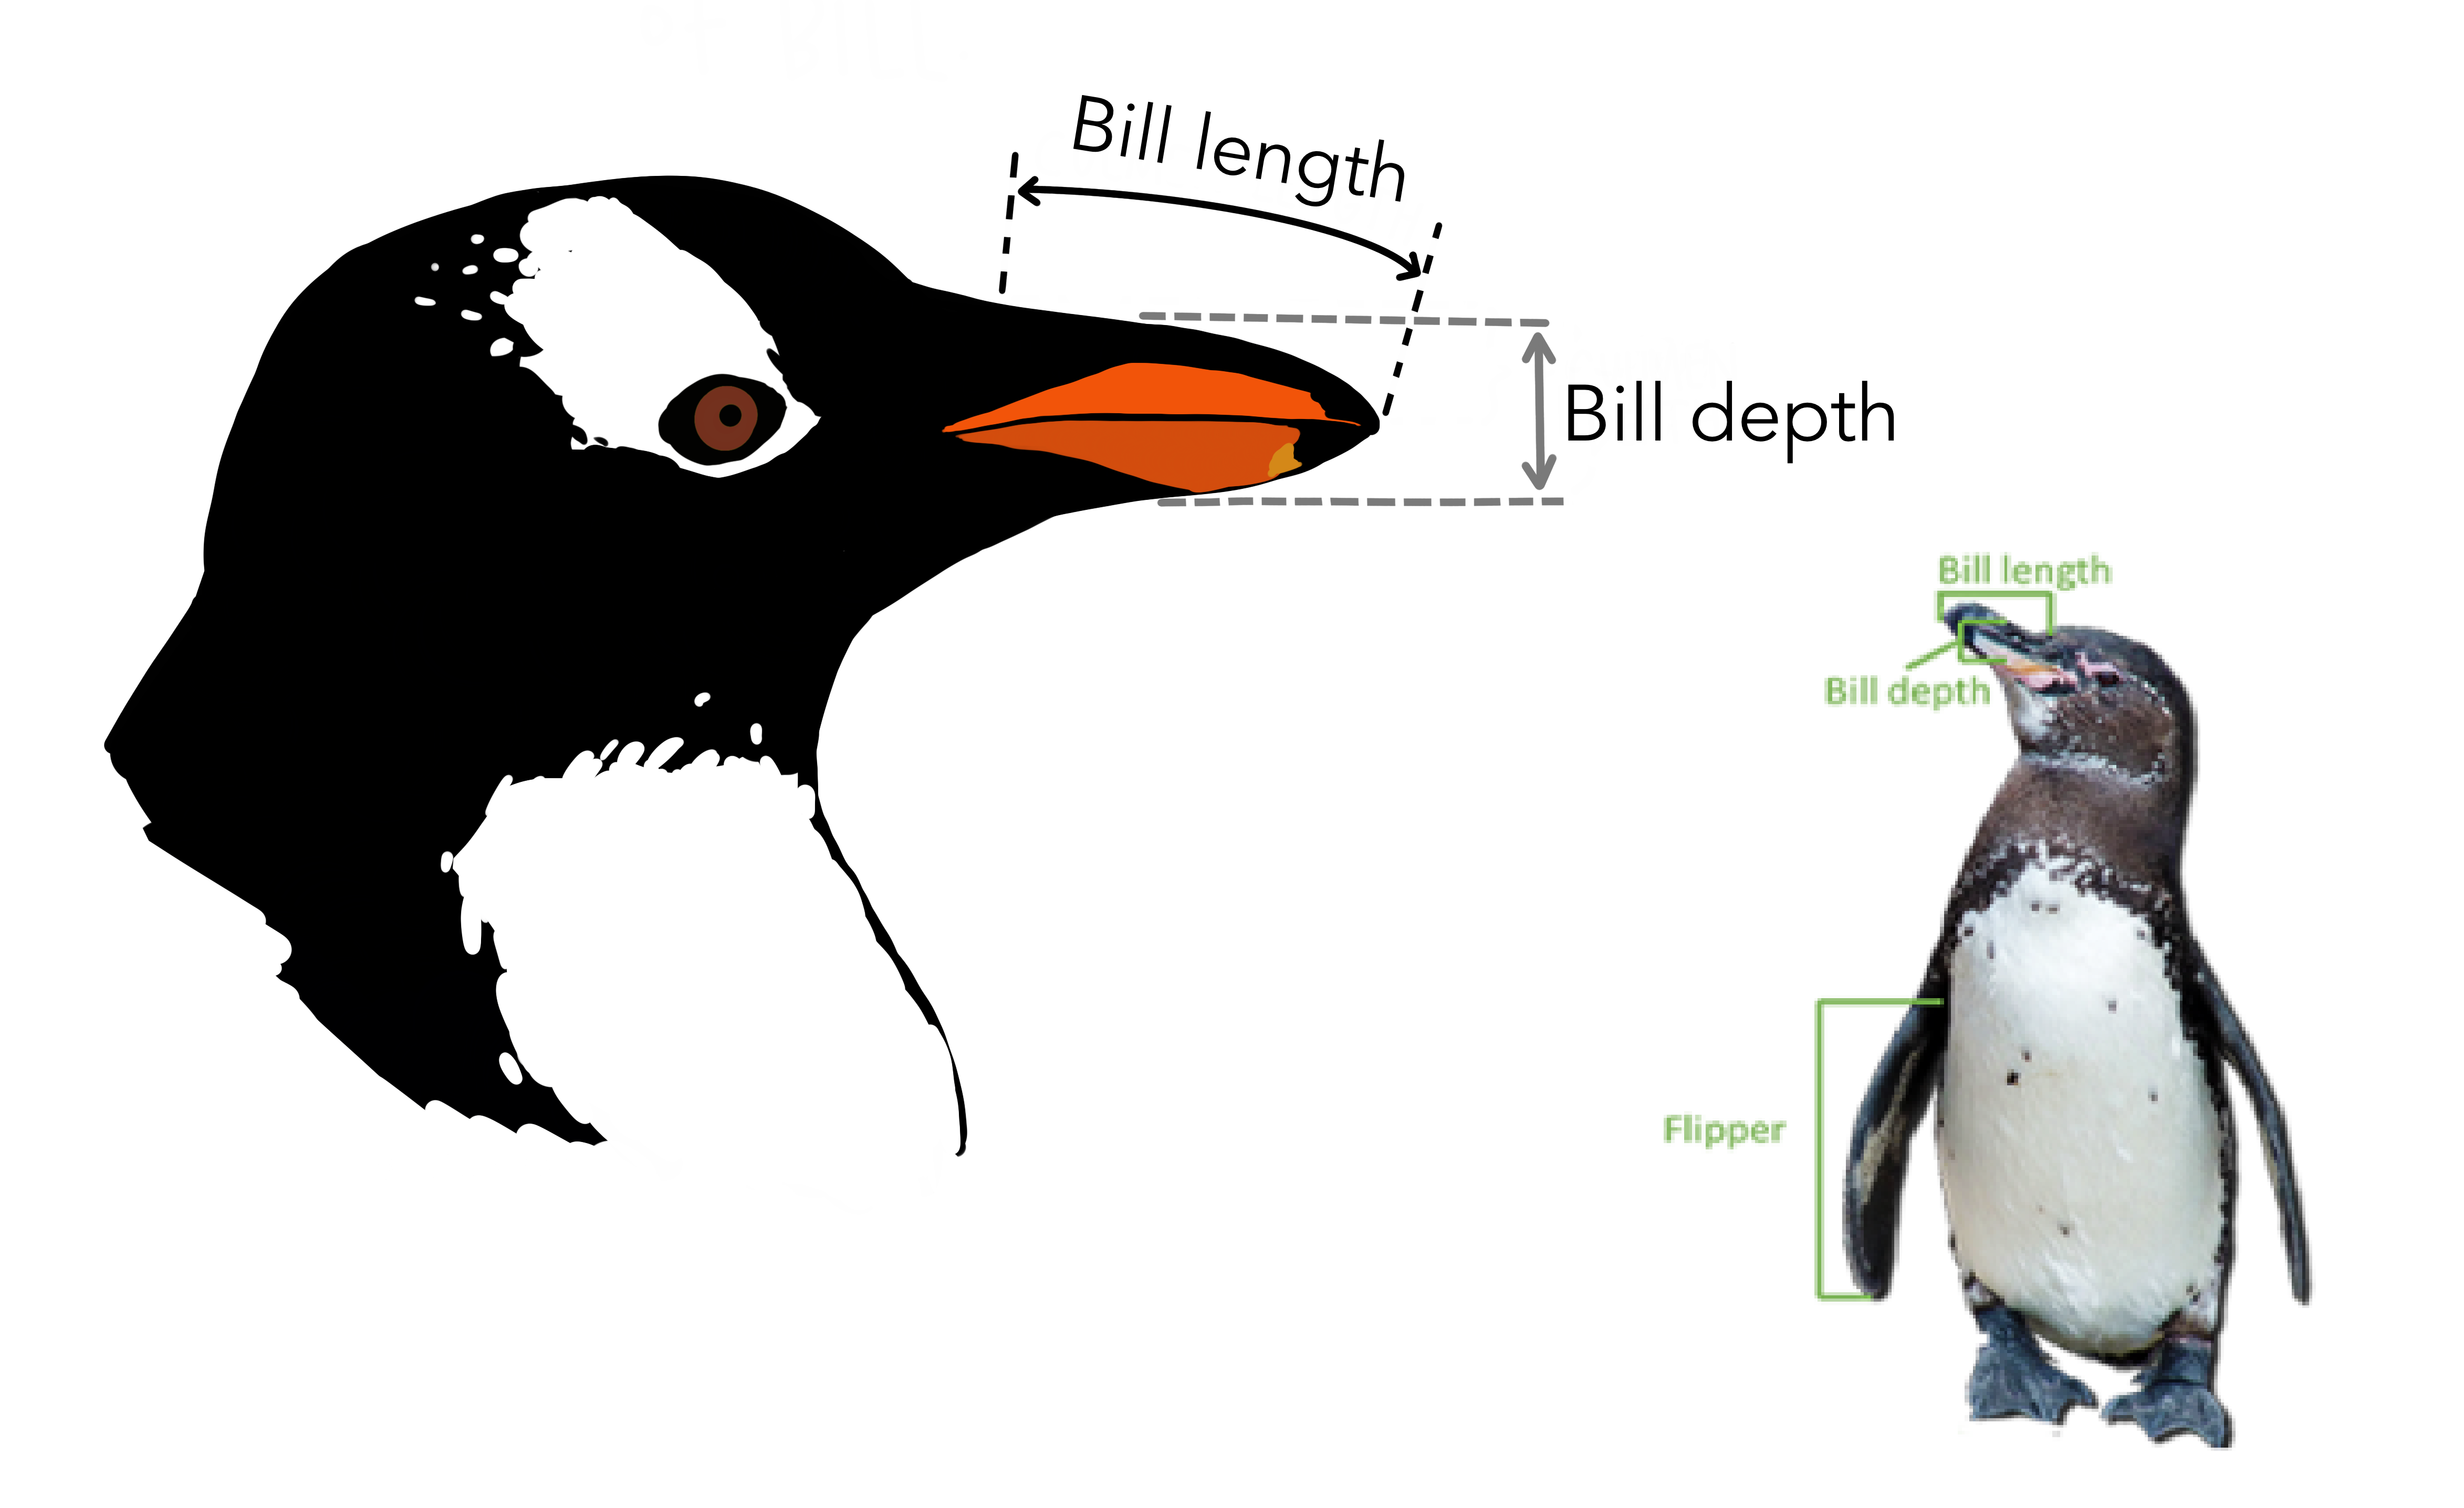

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider
%matplotlib inline

# სიმულირებული მონაცემები
np.random.seed(42)
beak_length = np.random.normal(50, 10, 100)
wing_length = np.random.normal(200, 30, 100)
weight = 5 * beak_length + 0.5 * wing_length + np.random.normal(0, 50, 100)

def plot_regression(slope_beak, intercept):
    plt.figure(figsize=(12, 5))

    # ნისკარტის სიგრძე vs წონა
    plt.subplot(121)
    plt.scatter(beak_length, weight, alpha=0.5)
    plt.xlabel('ნისკარტის სიგრძე (მმ)')
    plt.ylabel('წონა (გ)')
    plt.title('ნისკარტის სიგრძე vs წონა')

    x = np.linspace(min(beak_length), max(beak_length), 100)
    y = slope_beak * x + intercept
    plt.plot(x, y, 'r', label=f'y = {slope_beak:.2f}x + {intercept:.2f}')
    plt.legend()

    # ფრთის სიგრძე vs წონა
    plt.subplot(122)
    plt.scatter(wing_length, weight, alpha=0.5)
    plt.xlabel('ფრთის სიგრძე (მმ)')
    plt.ylabel('წონა (გ)')
    plt.title('ფრთის სიგრძე vs წონა')

    slope_wing = (max(weight) - min(weight)) / (max(wing_length) - min(wing_length))
    x = np.linspace(min(wing_length), max(wing_length), 100)
    y = slope_wing * x + intercept
    plt.plot(x, y, 'r', label=f'y = {slope_wing:.2f}x + {intercept:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

interactive_plot = interactive(plot_regression,
                               slope_beak=FloatSlider(min=0, max=10, step=0.1, value=5),
                               intercept=FloatSlider(min=-500, max=500, step=10, value=0))

interactive_plot

interactive(children=(FloatSlider(value=5.0, description='slope_beak', max=10.0), FloatSlider(value=0.0, descr…

Პინგვინის ნისკარტის სიმაღლე აღმოჩნდა მჭიდრო კორელაციაში წონასთან, როგორ შეგვიძლია ნისკარტის სიმაღლით გამოვითვალოთ პინგვინის წონა?(მიახლ.)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider
from scipy import stats
%matplotlib inline

def generate_correlated_data(n, correlation):
    mean = [0, 0]
    cov = [[1, correlation], [correlation, 1]]
    x, y = np.random.multivariate_normal(mean, cov, n).T
    return x, y

def plot_regression(correlation, slope_beak, intercept):
    n = 100
    beak_length, weight = generate_correlated_data(n, correlation)

    # ნორმალიზება და მასშტაბირება
    beak_length = (beak_length - beak_length.min()) / (beak_length.max() - beak_length.min()) * 50 + 25
    weight = (weight - weight.min()) / (weight.max() - weight.min()) * 1000 + 2000

    plt.figure(figsize=(12, 5))

    # ნისკარტის სიგრძე vs წონა
    plt.subplot(121)
    plt.scatter(beak_length, weight, alpha=0.5)
    plt.xlabel('ნისკარტის სიგრძე (მმ)')
    plt.ylabel('წონა (გ)')
    plt.title(f'ნისკარტის სიგრძე vs წონა\nკორელაცია: {correlation:.2f}')

    x = np.linspace(min(beak_length), max(beak_length), 100)
    y = slope_beak * x + intercept
    plt.plot(x, y, 'r', label=f'y = {slope_beak:.2f}x + {intercept:.2f}')
    plt.legend()

    # რეალური რეგრესიის ხაზი
    slope, intercept, r_value, p_value, std_err = stats.linregress(beak_length, weight)
    y_real = slope * x + intercept
    plt.plot(x, y_real, 'g--', label=f'რეალური: y = {slope:.2f}x + {intercept:.2f}')
    plt.legend()

    # R-squared
    plt.text(0.05, 0.95, f'R-squared: {r_value**2:.3f}', transform=plt.gca().transAxes,
             verticalalignment='top')

    plt.tight_layout()
    plt.show()

interactive_plot = interactive(plot_regression,
                               correlation=FloatSlider(min=-1, max=1, step=0.01, value=0.5,
                                                       description='კორელაცია:'),
                               slope_beak=FloatSlider(min=-50, max=50, step=0.1, value=20,
                                                      description='დახრილობა:'),
                               intercept=FloatSlider(min=0, max=5000, step=10, value=1000,
                                                     description='გადაკვეთა:'))

interactive_plot

interactive(children=(FloatSlider(value=0.5, description='კორელაცია:', max=1.0, min=-1.0, step=0.01), FloatSli…

სინამდვილეში, მონაცემები თითქმის არასდროს არის წრფივად დამოკიდებული ერთმანეთზე.წრფივი რეგრესია, რომელსაც ჩვენს კურსში მოგვიანებით გავეცნობით, სწორედ იმას ისახავს მიზნად, რომ მივიღოთ წრფე, რომელიც მაქსიმალურად ერგება და აღწერს ორი მონაცემების ერთმანეთზე დამოკიდებულებას.

წრფივ ფუნქციას ჩვენთის კარგად ნაცნობი სახე ექნება:

## **Y = mx + b**

Ამ ხაზს ეძახიან **regression line**-ს, ანუ წრფეს, რომელიც გამოხატავს დამოკიდებულებას X და Y ცვლადებს შორის. ჩვენ შეგვიძლია მისი საშუალებით გამოვხატოთ წრფივი დამოკიდებულება ორ მონაცემს შორის


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider
from scipy import stats
%matplotlib inline

# მონაცემების გენერირება
np.random.seed(42)
bill_depth = np.random.normal(18, 1, 200)
weight = 200 * bill_depth + np.random.normal(0, 200, 200)

def plot_regression(slope, intercept):
    plt.figure(figsize=(10, 6))
    plt.scatter(bill_depth, weight, alpha=0.5, color='wheat')
    plt.xlabel('Bill depth (mm)')
    plt.ylabel('Weight (g)')
    plt.title('Penguin Bill Depth vs Weight')

    # მომხმარებლის მიერ კონტროლირებადი რეგრესიის ხაზი
    x = np.linspace(min(bill_depth), max(bill_depth), 100)
    y = slope * x + intercept
    plt.plot(x, y, 'b-', linewidth=2, label=f'User: y = {slope:.2f}x + {intercept:.2f}')

    # რეალური რეგრესიის ხაზი
    slope_real, intercept_real, r_value, _, _ = stats.linregress(bill_depth, weight)
    y_real = slope_real * x + intercept_real
    plt.plot(x, y_real, 'r--', linewidth=2, label=f'Actual: y = {slope_real:.2f}x + {intercept_real:.2f}')

    plt.legend()
    plt.xlim(15, 22)
    plt.ylim(2000, 5000)

    # R-squared მნიშვნელობა
    plt.text(0.05, 0.95, f'R-squared: {r_value**2:.3f}', transform=plt.gca().transAxes,
             verticalalignment='top')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

interactive_plot = interactive(plot_regression,
                               slope=FloatSlider(min=0, max=400, step=1, value=200, description='Slope:'),
                               intercept=FloatSlider(min=-4000, max=4000, step=10, value=0, description='Intercept:'))

interactive_plot

interactive(children=(FloatSlider(value=200.0, description='Slope:', max=400.0, step=1.0), FloatSlider(value=0…

სადაც:

# * Y = mx + b

# * M- slope, წრფის დახრილობა (ანუ იმის მაჩვენებელი, თუ რამდენად იცვლება y x-ის ცვლილებასთან ფარდობითად.)

# * B - გადაკვეთის წერტილები (x-ის და yის)

# * X - input, შემავალი, დამოუკიდებელი მონაცემი

# * Y - output, გამომავალი მონაცემი, დამოკიდებული X-ზე




